In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib widget

In [2]:
data = np.load('Unsubtracted.npy', allow_pickle=True)

In [3]:
wave = data.item()['wavelength']
flux = data.item()['flux']
ivar = data.item()['ivar']
noise = 1 / np.sqrt(ivar)

In [10]:
type(flux)

numpy.ndarray

3299 3804


Text(0.5, 1.0, 'OII Plot')

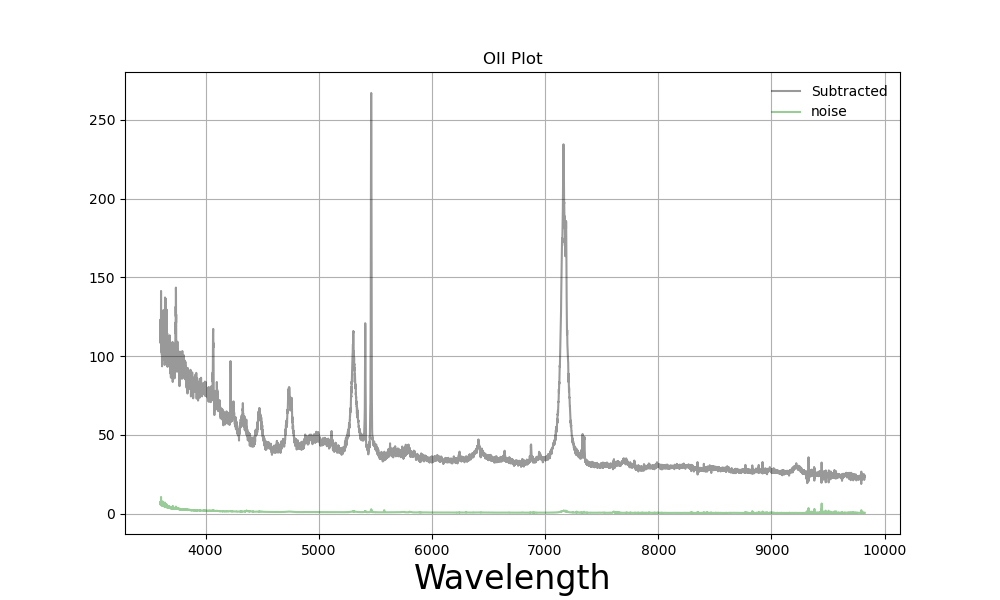

In [4]:
# Define the x-range for the zoomed-in section
x_min2 = 3727 * (1 + .674) - 20
x_max2 = 3727 * (1 + .674) + 20
peak2 = 3727 * (1 + .674)

x_min1 =  6643 - 20
x_max1 = 6643 + 20
peak1 = 6643

x_indices2 = np.where(( wave >= x_min2) & ( wave <= x_max2))
x_indices1 = np.where(( wave >= x_min1) & ( wave <= x_max1))
xpeak1 = np.where(( wave >= peak1-0.5) & ( wave <= peak1+0.5))[0][0]
xpeak2 = np.where(( wave >= peak2-0.5) & ( wave <= peak2+0.5))[0][0]
print(xpeak2, xpeak1)

# fig = plt.figure(figsize=(20, 6))
# gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Plot the zoomed-in data on the right section
fig, ax1 = plt.subplots(1,1, figsize=(10, 6))
ax1.plot(wave, flux, 'k-', label='Subtracted', alpha=0.4)
ax1.plot(wave, noise, 'g', label='noise', alpha=0.4)
ax1.set_xlabel("Wavelength", fontsize=24)
ax1.grid(True)
# ax1.set_xlim(x_min2, x_max2)
# ax1.set_ylim(min_y_within_x_range, max_y_within_x_range)
ax1.legend(loc=0, frameon=False)
ax1.set_title('OII Plot')

In [8]:
type(x_max2)

float

Text(0.5, 1.0, 'NeIII Plot')

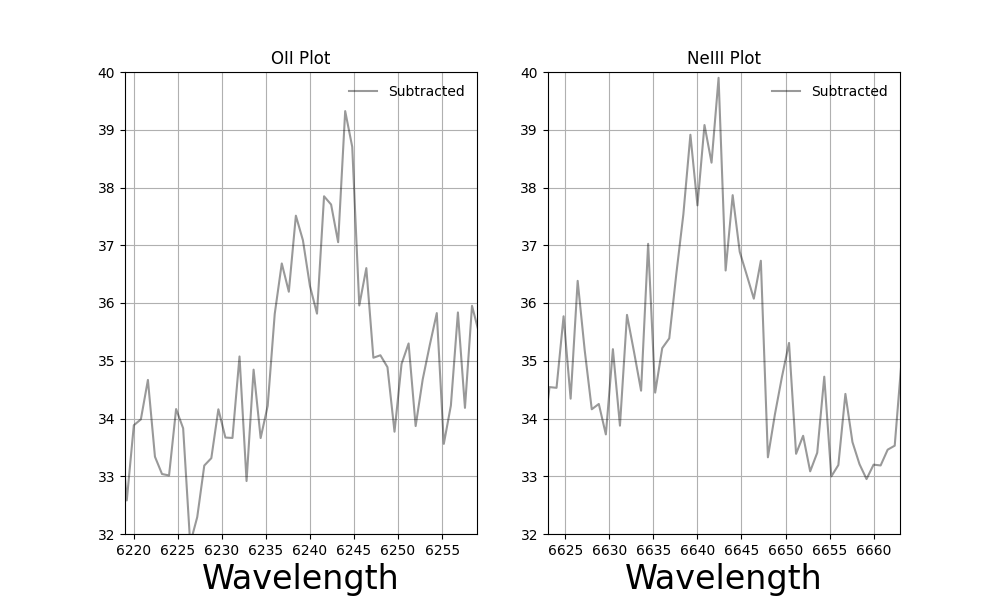

In [5]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 6))
ax1.plot(wave, flux, 'k-', label='Subtracted', alpha=0.4)
ax1.set_xlabel("Wavelength", fontsize=24)
ax1.grid(True)
ax1.set_xlim(x_min2, x_max2)
ax1.set_ylim(32,40)
ax1.legend(loc=0, frameon=False)
ax1.set_title('OII Plot')

ax2.plot(wave, flux, 'k-', label='Subtracted', alpha=0.4)
ax2.set_xlabel("Wavelength", fontsize=24)
ax2.grid(True)
ax2.set_xlim(x_min1, x_max1)
ax2.set_ylim(32,40)
ax2.legend(loc=0, frameon=False)
ax2.set_title('NeIII Plot')

In [6]:
width = 10
dx = 0.8 

continuum1 = flux[xpeak1-width-10 : xpeak1-width ].tolist() + flux[xpeak1+width: xpeak1+width+10].tolist()
continuum2 = flux[xpeak2-width-10 : xpeak2-width ].tolist() + flux[xpeak2+width: xpeak2+width+10].tolist()

print(continuum1)
print(len (continuum1))

print("NeIII local continuum: ", np.mean(continuum1))
print("OII local continuum: ", np.mean(continuum2))

[35.179405212402344, 34.159942626953125, 34.25170135498047, 33.72468948364258, 35.20067596435547, 33.87588882446289, 35.79423904418945, 35.151763916015625, 34.48194122314453, 37.02490234375, 33.38867950439453, 33.7004508972168, 33.084835052490234, 33.40644454956055, 34.72442626953125, 32.996707916259766, 33.19403839111328, 34.4261474609375, 33.59245681762695, 33.20939254760742]
20
NeIII local continuum:  34.22843647003174
OII local continuum:  34.05961399078369


Text(0.5, 1.0, 'OII Plot')

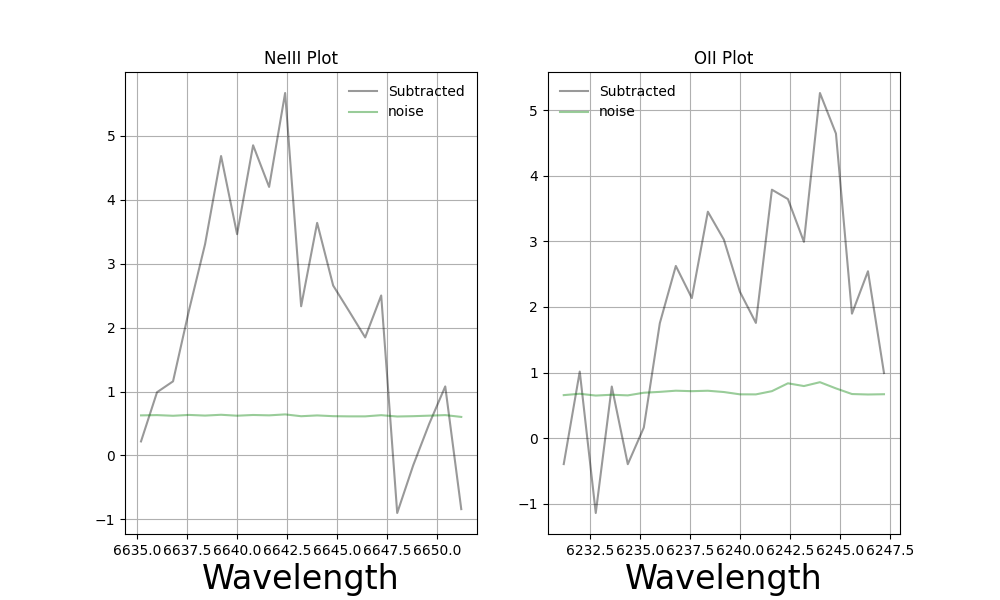

In [9]:
NeIII = flux[xpeak1-width: xpeak1+width+1 ] - np.mean(continuum1)
waveNeIII = wave[xpeak1-width: xpeak1+width+1 ] 
noiseNeIII = np.sqrt( 1/ ivar[xpeak1-width: xpeak1+width+1] ) 
OII = flux[xpeak2-width: xpeak2+width+1 ] - np.mean(continuum2)
waveOII = wave[xpeak2-width: xpeak2+width+1 ] 
noiseOII = np.sqrt( 1/ ivar[xpeak2-width: xpeak2+width+1] ) 

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 6))
ax1.plot(waveNeIII, NeIII, 'k-', label='Subtracted', alpha=0.4)
ax1.plot(waveNeIII, noiseNeIII, 'g-', label='noise', alpha=0.4)
ax1.set_xlabel("Wavelength", fontsize=24)
ax1.grid(True)
ax1.legend(loc=0, frameon=False)
ax1.set_title('NeIII Plot')

ax2.plot(waveOII, OII, 'k-', label='Subtracted', alpha=0.4)
ax2.plot(waveOII, noiseOII, 'g-', label='noise', alpha=0.4)
ax2.set_xlabel("Wavelength", fontsize=24)
ax2.grid(True)
ax2.legend(loc=0, frameon=False)
ax2.set_title('OII Plot')


In [25]:
signalOII = np.sum(OII)
signalNeIII = np.sum(NeIII)
signaltot = signalOII + signalNeIII

noiseOII_line = np.sqrt(np.sum(noiseOII**2)) #adding in quadrature the noise
noiseNeIII_line = np.sqrt(np.sum(noiseNeIII**2)) #adding in quadrature the noise

noise_tot_line = np.sqrt(np.sum(noiseNeIII**2+ noiseOII**2))

print("SNR OII:", signalOII/ noiseOII_line)
print("SNR NeIII:", signalNeIII/ noiseNeIII_line)

print("SNR tot:",signaltot/noise_tot_line )

SNR OII: 13.15972437154038
SNR NeIII: 16.01205592973724
SNR tot: 20.45505874268039
